In [1]:
"""
Chapter 11 - Time Series:
Anything that is observed, measured at many points in time forms a time series.
Many time series are fixed frequency,
which is to say that data points coour at regular intervals according to some rule,
such as every 15 secs, 5 mins, or per month. Time Series can also be irregular without fixed unit
of time or offset between units. How to mark and refer to time series data depends on the application
and you may have one of the following:
    * Timestamps specific instants in time
    * Fixed periods, such as the month January 2007 of the  full year 2010
    * Intervals of time, indicated by a start and end timestamp.
        Periods can be thought of as special cases of intervals
    * Experiment or elapsed time;
        each timestamp is a measure of time relative to a particular start time:
            (the diameter of a cookie baking each second sicne being placed in the oven)
"""
# Date and Time Data Types and Tools 
import pandas as pd
import numpy as np

from datetime import datetime

now = datetime.now()

display(now)

print(now.year, now.month, now.day)

# datime stores both the date and time down to the microsecond.
# timedelta represents the temporal difference between two datetime objects:

delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

display(delta)

display(delta.days)

display(delta.seconds)

# add / subtract a timedelta | multiple thereof to datetime object to yield a new shifed object

from datetime import timedelta

start = datetime.now()

start + timedelta(12)

print('Types in datetime module page 325')

datetime.datetime(2021, 10, 13, 17, 11, 7, 861753)

2021 10 13


datetime.timedelta(days=926, seconds=56700)

926

56700

Types in datetime module page 325


In [2]:
# Converting Between String and Datetime 
# format datetime object & pd Timestamp object,using srt|strftime method, pass f specification

stamp = datetime(2011, 1, 3)

display(str(stamp))

display(stamp.strftime("%Y-%m-%d"))

print('Datetime format specification page 325')

'2011-01-03 00:00:00'

'2011-01-03'

Datetime format specification page 325


In [3]:
# Use many of the same format codes to conver strings to dates using datetime.strptime
    # some codes like %F cannot be used
    
value = '2011-01-03'
display(datetime.strptime(value, '%Y-%m-%d'))

display(datetime(2011, 1, 3, 0, 0))

daatestrs = ['7/6/2011', '8/6/2011']

display(daatestrs)

display([datetime.strptime(x, '%m/%d/%Y') for x in daatestrs])

# datetime.strptime is a good way to parse a date with a known format.
# avaoid writing format sects eachtime use the parser.parse method in 3rd-party dateutil package

from dateutil.parser import parse

display(parse('2011-01-03'))

# dateutil is capable of parsing most human -intelligible date representaions

display(parse('Jan 31, 1997 10:45 PM'))

# for day appearing before month pass dayfirst=True to indicate this

display(parse('6/12/2021', dayfirst=True))

# pd uses arr as axis idx|col in df.to_datetime parses different kinds of date representations.

datesrts = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

display(pd.to_datetime(datesrts))

print('Locale-specific date formatting')

datetime.datetime(2011, 1, 3, 0, 0)

datetime.datetime(2011, 1, 3, 0, 0)

['7/6/2011', '8/6/2011']

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

datetime.datetime(2011, 1, 3, 0, 0)

datetime.datetime(1997, 1, 31, 22, 45)

datetime.datetime(2021, 12, 6, 0, 0)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

Locale-specific date formatting


In [4]:
"""
# Time Series Basics:
    A basic kind of time series object in pd is a series indexed by timestamps,
    which is often represented external to pd as py strings or datetime objects:
"""

from datetime import datetime

dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.randn(6), index=dates)

display(ts)

# Under the hood, these satetime objects have been put in a datetimeIndex:

display(ts.index)

# Like other Series, arithmetic operations between differently indexed time series automatically 
# aling on the dates:
ts + ts[::2]

# Scalar values from a DatietimeIndex are pd timsestamp objects:

stamp = ts.index[0]

display(stamp)

# A timestamp can be substitues anuwhere you would use a datetime object. Also it can store 
# frequency information and usntands how to do time zone conversions and other manipulations.

2011-01-02   -1.671792
2011-01-05   -1.986466
2011-01-07    0.147014
2011-01-08    0.925276
2011-01-10   -0.795081
2011-01-12   -1.328955
dtype: float64

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

Timestamp('2011-01-02 00:00:00')

In [5]:
# Indexing, Selection, Subsetting
# Time series behaves like any other pd.Series when you are indexing and selecting data based on label:

stamp = ts.index[2]

display(ts[stamp])

# As a convenience, you can also pass s string that is interpretable as a date:

display(ts['1/10/2011'])

display(ts['20110110'])

# For longer time series, a year or only a year and month can be passed to easily selct slices of data:

longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))

display(longer_ts)

display(longer_ts['2001'][:5])

# Here the string "2001" is interpreted as a year and selects that time period. 
# This works if you specify the month:

display(longer_ts['2001-05'][:5])

# Slicing with datime onjects works as well:

display(ts[datetime(2011, 1, 7):])

# You can slice with timestamps not contained in a time series to perform a range query:

display(ts['1/6/2011':'1/11/2011'])

# Modifications on the slice will be reflactied in ther original data

# These is an equivalent instance methos , trucate, that slices a Series betweeen two dates:

display(ts.truncate(after='1/9/2011'))

# All this holds for the df as well, indexing on its rows:

0.14701397338144617

-0.7950808562427746

-0.7950808562427746

2000-01-01    1.262395
2000-01-02   -1.940803
2000-01-03   -1.502487
2000-01-04   -0.161514
2000-01-05   -1.768813
                ...   
2002-09-22   -0.427228
2002-09-23   -0.274869
2002-09-24    0.043071
2002-09-25    0.649159
2002-09-26   -0.390599
Freq: D, Length: 1000, dtype: float64

2001-01-01   -2.044789
2001-01-02    0.555724
2001-01-03   -0.301791
2001-01-04   -0.439534
2001-01-05   -1.036867
Freq: D, dtype: float64

2001-05-01   -2.515559
2001-05-02    0.486204
2001-05-03   -1.380313
2001-05-04    1.687745
2001-05-05   -0.360070
Freq: D, dtype: float64

2011-01-07    0.147014
2011-01-08    0.925276
2011-01-10   -0.795081
2011-01-12   -1.328955
dtype: float64

2011-01-07    0.147014
2011-01-08    0.925276
2011-01-10   -0.795081
dtype: float64

2011-01-02   -1.671792
2011-01-05   -1.986466
2011-01-07    0.147014
2011-01-08    0.925276
dtype: float64

In [6]:
# Time Series with Duplucate Indices 
# In some apllications, there may be multiple data obsevations falling on a particualr timmestamp

In [7]:
"""
# 11.3: Date Ranges, Frequencies, and Shifting

You can convert the sample time series to be fixed daily frequency by calling resample:
"""

ts

resampler = ts.resample("D") # D daily frequency; Here we use base frequencies and multiples thereof

# Generating Date Ranges: pd.date_range is responsible for generating a DatatimeIndex 

index = pd.date_range('2012-04-01', '2012-06-01')

display(index)

# By default, date_range genarates daily timestamps. If you pass only a strat or end date
# You must pass a number of periods to generate:

may = pd.date_range(start='2012-04-01', periods=20)
        
june = pd.date_range(end='2012-06-01', periods=20)

display(may)
                     
display(june)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [8]:
"""
The start and end dates define strict boundaries for the generated date index.

Base time series frequencies (not comphensive page 355)

date_range by default preserves the time (in any) of the start or end stomestamp:
"""                     
non_mod = pd.date_range('2012-05-02 12:56:31',
              periods=5)

# To mormalized to mifnight as a convention. Use the normalize option:

norm = pd.date_range('2012-05-02 12:56:31',
              periods=5,
              normalize=True)

display(non_mod)

display(norm)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [9]:
# Frequencies and Date Offsets 

from pandas.tseries.offsets import Hour, Minute

hour = Hour()

display(hour)

# You can define a multipkle of an offset by passing an integer:

four_hours = Hour(4)

display(four_hours)

# Putting an interger before the base frequency creates a mulitple

multiple = pd.date_range("2000-01-01", '2000-01-03', freq='4h')

display(multiple)

# Many offsets can be combined together by addition:

Hour(2) + Minute(30)

# Pass a frequency strings, like '1h30min', that will effectively be parsed to the expressing:

custom_mod = pd.date_range('2021-01-01', periods=10, freq='1h30min')

display(custom_mod)

<Hour>

<4 * Hours>

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:30:00',
               '2021-01-01 03:00:00', '2021-01-01 04:30:00',
               '2021-01-01 06:00:00', '2021-01-01 07:30:00',
               '2021-01-01 09:00:00', '2021-01-01 10:30:00',
               '2021-01-01 12:00:00', '2021-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [10]:
# Week of month dates: WOM enables you to get dates like the third Friday of each month:

rng = pd.date_range('2020-01-01', '2020-09-01', freq='WOM-3FRI')

display(rng)

# Shifting (Leading and Lagging) Data
# "shifting" refers to moving data backward and foward through time.
# Both Series and df have shift method for doing naive shifts forward or abckeard
# Leaving index unmodified:

ts = pd.Series(np.random.randn(4),
              index=pd.date_range('1/1/2000', periods=4, freq='M'))

display(ts)

display(ts.shift(2))

display(ts.shift(-2))

# A common use of shift is computing % change in a time series or multiple series as df columns.

display(ts / ts.shift(1) -1)

# Frequency is known, it can passed to shitf to advance the timestamps instead of simple the data

display(ts.shift(2, freq='M'))

# Other frequencies can be apssed, too, giving you some flaexibility in how to lead and lag data

display(ts.shift(3, freq='D'))

display(ts.shift(1, freq='90T'))

# The T stands for minutes. Note that the freq parameter here indicates the offset to apply to the
# timestamps, but it does not change the underlying frequncy of the data, if any

# Shifting, dates wiiht offsets; The pandas date ofsets can also be used with datetime|Timestamp

from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2011, 11, 17)

display(now + 3 * Day())

# If you add an anchored offset like MonthEnd, the first increment will 'roll forward' 
# a date to the next date according to the frequency rule:

display(now + MonthEnd())

display(now + MonthEnd(2))

# Anchored offets can explicitly 'roll' dates forward or backward by simply suning there 
# rollfowaed and rollback methods,respectively:

offset = MonthEnd()

display(offset.rollforward(now))

display(offset.rollback(now))

# A creative use of date offsets in to use these methods with groupby:

ts = pd.Series(np.random.randn(20),
              index=pd.date_range('1/15/2000', periods=20, freq='4d'))

display(ts)

display(ts.groupby(offset.rollback).mean())

display(ts.resample('M').mean())


DatetimeIndex(['2020-01-17', '2020-02-21', '2020-03-20', '2020-04-17',
               '2020-05-15', '2020-06-19', '2020-07-17', '2020-08-21'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

2000-01-31    0.323411
2000-02-29    0.314570
2000-03-31   -0.675444
2000-04-30    1.229575
Freq: M, dtype: float64

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.323411
2000-04-30    0.314570
Freq: M, dtype: float64

2000-01-31   -0.675444
2000-02-29    1.229575
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

2000-01-31         NaN
2000-02-29   -0.027337
2000-03-31   -3.147198
2000-04-30   -2.820394
Freq: M, dtype: float64

2000-03-31    0.323411
2000-04-30    0.314570
2000-05-31   -0.675444
2000-06-30    1.229575
Freq: M, dtype: float64

2000-02-03    0.323411
2000-03-03    0.314570
2000-04-03   -0.675444
2000-05-03    1.229575
dtype: float64

2000-01-31 01:30:00    0.323411
2000-02-29 01:30:00    0.314570
2000-03-31 01:30:00   -0.675444
2000-04-30 01:30:00    1.229575
dtype: float64

Timestamp('2011-11-20 00:00:00')

Timestamp('2011-11-30 00:00:00')

Timestamp('2011-12-31 00:00:00')

Timestamp('2011-11-30 00:00:00')

Timestamp('2011-10-31 00:00:00')

2000-01-15   -0.348630
2000-01-19   -0.242899
2000-01-23    1.531511
2000-01-27    0.800669
2000-01-31   -1.490771
2000-02-04   -1.215172
2000-02-08    0.344875
2000-02-12   -0.831604
2000-02-16   -0.067861
2000-02-20    0.889792
2000-02-24    1.703046
2000-02-28   -0.802500
2000-03-03   -0.152938
2000-03-07    0.916087
2000-03-11   -0.515430
2000-03-15    0.025064
2000-03-19    3.203713
2000-03-23    0.092109
2000-03-27    0.141511
2000-03-31    0.733799
Freq: 4D, dtype: float64

1999-12-31    0.435163
2000-01-31   -0.183774
2000-02-29    0.530017
2000-03-31    0.733799
dtype: float64

2000-01-31    0.049976
2000-02-29    0.002939
2000-03-31    0.555489
Freq: M, dtype: float64

In [11]:
"""
# TIme Zone Handling

Working with time zones generally considered one of most unpleasnt part of timeseries manipulation
Coordinated Universal Time or UTC, which is the international standard. 
Timezones are expressed as offsets from UTC.
"""

import pytz

display(pytz.common_timezones[-5:])

# To get a time zone object form pytz, use pytz.timezone:

tz = pytz.timezone('America/New_York')

display(tz)

# Time Zone Localization and Conversion: times series in pd are time zine naive.

png = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

display(png)

ts = pd.Series(np.random.rand(len(rng)), index=rng)

display(ts)

# Time index's tz fiels is None:

print(ts.index.tz)

# Date ranges can be generatged with a time zone set:

geneatedZone = pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')
display(geneatedZone)

# Conversion from naice to localized is handled by the tz_localize method:
ts_utc = ts.tz_localize('UTC')

display(ts_utc)

display(ts_utc.index)

# Once a timezone had been localized to a particular timezone,
# conver it to another with tz_convert:
display(ts_utc.tz_convert('America/New_York'))

# localize to EST and convert to, say, UTC or Berlin time:

ts_eastern = ts.tz_localize('America/New_York')

display(ts_eastern.tz_convert('UTC'))

display(ts_eastern.tz_convert("Europe/Berlin"))

# tz_localize and tz_convert are also methods on datatimeindex:

display(ts.index.tz_localize('Asia/Shanghai'))

# Localizing naive timestmaps also checks for ambiguous or non-exixtent times around daylight time trnascaations


['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')

2020-01-17    0.512878
2020-02-21    0.206506
2020-03-20    0.691789
2020-04-17    0.800493
2020-05-15    0.785732
2020-06-19    0.388258
2020-07-17    0.290691
2020-08-21    0.569047
Freq: WOM-3FRI, dtype: float64

None


DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

2020-01-17 00:00:00+00:00    0.512878
2020-02-21 00:00:00+00:00    0.206506
2020-03-20 00:00:00+00:00    0.691789
2020-04-17 00:00:00+00:00    0.800493
2020-05-15 00:00:00+00:00    0.785732
2020-06-19 00:00:00+00:00    0.388258
2020-07-17 00:00:00+00:00    0.290691
2020-08-21 00:00:00+00:00    0.569047
Freq: WOM-3FRI, dtype: float64

DatetimeIndex(['2020-01-17 00:00:00+00:00', '2020-02-21 00:00:00+00:00',
               '2020-03-20 00:00:00+00:00', '2020-04-17 00:00:00+00:00',
               '2020-05-15 00:00:00+00:00', '2020-06-19 00:00:00+00:00',
               '2020-07-17 00:00:00+00:00', '2020-08-21 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='WOM-3FRI')

2020-01-16 19:00:00-05:00    0.512878
2020-02-20 19:00:00-05:00    0.206506
2020-03-19 20:00:00-04:00    0.691789
2020-04-16 20:00:00-04:00    0.800493
2020-05-14 20:00:00-04:00    0.785732
2020-06-18 20:00:00-04:00    0.388258
2020-07-16 20:00:00-04:00    0.290691
2020-08-20 20:00:00-04:00    0.569047
Freq: WOM-3FRI, dtype: float64

2020-01-17 05:00:00+00:00    0.512878
2020-02-21 05:00:00+00:00    0.206506
2020-03-20 04:00:00+00:00    0.691789
2020-04-17 04:00:00+00:00    0.800493
2020-05-15 04:00:00+00:00    0.785732
2020-06-19 04:00:00+00:00    0.388258
2020-07-17 04:00:00+00:00    0.290691
2020-08-21 04:00:00+00:00    0.569047
dtype: float64

2020-01-17 06:00:00+01:00    0.512878
2020-02-21 06:00:00+01:00    0.206506
2020-03-20 05:00:00+01:00    0.691789
2020-04-17 06:00:00+02:00    0.800493
2020-05-15 06:00:00+02:00    0.785732
2020-06-19 06:00:00+02:00    0.388258
2020-07-17 06:00:00+02:00    0.290691
2020-08-21 06:00:00+02:00    0.569047
dtype: float64

DatetimeIndex(['2020-01-17 00:00:00+08:00', '2020-02-21 00:00:00+08:00',
               '2020-03-20 00:00:00+08:00', '2020-04-17 00:00:00+08:00',
               '2020-05-15 00:00:00+08:00', '2020-06-19 00:00:00+08:00',
               '2020-07-17 00:00:00+08:00', '2020-08-21 00:00:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

In [12]:
# Operations with Time Zone - Aware Timestamp Objects:
# Timestamp obj can be localized from naive to timezone-aware and converter one time zone to another
stamp = pd.Timestamp('2011-03-12 04:00')

stamp_utc = stamp.tz_localize('utc')

display(stamp_utc.tz_convert('America/New_York'))

# One can also pass the timezone while creating the timestamp

stam_moscow = pd.Timestamp('2011-03-12 4:00', tz='Europe/Moscow')

display(stam_moscow)

# Timezone-aware Timestamp objects internally store a UTC timestamp value as nanoseconds
# This UTC value is invariant between time zone conversions:

display(stamp_utc.value)

display(stamp_utc.tz_convert('America/New_York').value)

# when performing time arithmetic using pandas DateOffset objects,
# pd prespects daylight saving tome transactions where possible.
# Here we construct tomestamps that occur right before DTF transitions (Forward and Backward)
# First, 30 minutes before transitioning to DST:

from pandas.tseries.offsets import Hour

stamp = pd.Timestamp('2012-03-11 01:30', tz='US/Eastern')
display(stamp)

display(stamp + Hour())

# Then, 90 minutes before transitiong out of DST

stamp1 = pd.Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')
display(stamp1)

display(stamp + 2 * Hour())

# Operations Between Different Time Zones 
# IF two time series with different timezones are combined, the result will be UTC.
# Since the timestamps are stored under the hood in utc,
# this is a strightforward operation and requies no conversion

rng1 = pd.date_range('3/7/2012 9:30', periods=10, freq='B')

ts1 = pd.Series(np.random.randn(len(rng1)), index=rng1)

display(ts1)

ts11 = ts1[:7].tz_localize('Europe/London')

ts2 = ts11[2:].tz_convert('Europe/Moscow')

result = ts11 + ts2

display(result.index)

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

1299902400000000000

1299902400000000000

Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

Timestamp('2012-03-11 04:30:00-0400', tz='US/Eastern')

2012-03-07 09:30:00    0.351314
2012-03-08 09:30:00    0.190671
2012-03-09 09:30:00   -0.212917
2012-03-12 09:30:00    1.356670
2012-03-13 09:30:00   -1.894094
2012-03-14 09:30:00   -0.599570
2012-03-15 09:30:00    0.765905
2012-03-16 09:30:00   -0.293791
2012-03-19 09:30:00    0.855750
2012-03-20 09:30:00    0.648576
Freq: B, dtype: float64

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [13]:
"""
# Periods and Period Arithmetic 

Periods represent timespands, like days, months, quarters, or years.
The period class represents this data type, requiring a string or integer and a frquency

"""

p = pd.Period(2007, freq='A-DEC')

# Here the period object represnts the full timespan from Jan 1 - Dec 31 inclusive.

display(p)

# COnveniently, adding and subtracting ints from periods shifts by their frequency:

display(p + 5)

display(p - 2)

# if tww periods the dame frequency, their diffrence is the number of units between them

display(pd.Period('2014', freq='A-DEC') - p)

# regular ranges of periods cna be constructed with the period_range function

per_rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
display(per_rng)

# The PeriodIndex class stores a sequence of periods and can serve as
# an axis index in any pands data strcuture.

display(pd.Series(np.random.randn(6), index=per_rng))

# If you have an array of strings, you can also use the PeriodIndex class:

values = ['2001Q3', '2002Q2', "2003Q1"]

indexS = pd.PeriodIndex(values, freq='Q-DEC')

display(indexS)

Period('2007', 'A-DEC')

Period('2012', 'A-DEC')

Period('2005', 'A-DEC')

<7 * YearEnds: month=12>

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

2000-01   -0.364017
2000-02    0.438591
2000-03   -1.718622
2000-04    1.091022
2000-05   -0.185022
2000-06   -2.012804
Freq: M, dtype: float64

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

In [14]:
"""
# Period Frequency Conversion
Periods and PeriodIndex objects can be converted to another frequency with their asfreq method.
"""

p = pd.Period('2007', freq='A-DEC')

display(p)

display(p.asfreq('M', how='start'))

display(p.asfreq('M', how='end'))

# One can think of Period('2007', 'A-DEC') as being a sort of cursor pointing to a span of time
# subdivided by monthly periods. For a fiscal year ending on a month other than December,
# the corresponding monthly subperiods are different:

p = pd.Period('2007', 'A-JUN')

display(p)

display(p.asfreq('M', 'start'))

display(p.asfreq('M', 'end'))

# When you are converting from high to low frequency, pandas determines the super-period 
# depending on where the subperiod 'belongs.' For example, in A-JUN frequency,
# the month aug-2007 is actually part of the 2008 period:

p = pd.Period('Aug-2007', 'M')

display(p.asfreq('A-JUN'))

# Whole PeriodINdex objects or time series can be similarly converted with the same semantics:

rng = pd.period_range('2006', '2009', freq='A-DEC')

ts = pd.Series(np.random.randn(len(rng)), index=rng)

display(ts)

# If we instead wanted the last business day of each year,
# we can use the 'B' frequency and indicate that we want the end of the period:

display(ts.asfreq('B', how='end'))

Period('2007', 'A-DEC')

Period('2007-01', 'M')

Period('2007-12', 'M')

Period('2007', 'A-JUN')

Period('2006-07', 'M')

Period('2007-06', 'M')

Period('2008', 'A-JUN')

2006    0.838088
2007   -1.491177
2008    1.219357
2009   -0.470802
Freq: A-DEC, dtype: float64

2006-12-29    0.838088
2007-12-31   -1.491177
2008-12-31    1.219357
2009-12-31   -0.470802
Freq: B, dtype: float64

In [15]:
# Quarterly Period Frequencies 

"""
Q data is standard in accounting, finance, and other fields.
quarterly data is reported realtive to fiscal year end, typically the last calendar or bussiness
day of one the 12 months of the year. Thus, the period 2012Q4 has a different meaning depending
on fiscal year end. pandas supports all 12 possible quarterly frequencies as Q-JAN through Q-DEC:

DIfferent quarterly frequency converntions page 349
"""

p = pd.Period('2012Q4', freq='Q-JAN')

display(p)

# Thus, itls possible to do easy period arithmetic; for example,
# to get the timestamp at 4 PM on the second-to-last businees day of the quarter, you could do:

p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60 

display(p4pm)

display(p4pm.to_timestamp())

# You can genarate quarterly ranges using period_range. Arithmetic is indentical, too:

rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

ts = pd.Series(np.arange(len(rng)), index=rng)

display(ts)

new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

ts.index = new_rng.to_timestamp()

display(ts)

Period('2012Q4', 'Q-JAN')

Period('2012-01-30 16:00', 'T')

Timestamp('2012-01-30 16:00:00')

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

In [16]:
"""
# COnverting Timestamps to Periods (and Back)
Series and DataFrame objects indexed by timestamps can be converted
to periods with the to_period method:
"""

rng = pd.date_range('2001-01-01', periods=3, freq='M')

ts = pd.Series(np.random.randn(3), index=rng)

display(ts)

pts = ts.to_period()

display(pts)

display(pts.to_timestamp(how='end'))

# Creating a PeriodIndex from Arrays 
# Fixed frequency datasests are sometimes stored with timespan information spraed accros multiple cols

mac_data = pd.read_csv('macrodata.csv')

mac_data[:5]

# By passing these arrays to PeriosIndex with a
# frequencym you can combine tham to form an index for the DataFrame

index = pd.PeriodIndex(year=mac_data.year, quarter = mac_data.quarter,
                      freq='Q-DEC')

display(index)

mac_data.index = index

display(mac_data.infl)

2001-01-31    1.551288
2001-02-28    0.197186
2001-03-31   -1.141906
Freq: M, dtype: float64

2001-01    1.551288
2001-02    0.197186
2001-03   -1.141906
Freq: M, dtype: float64

2001-01-31 23:59:59.999999999    1.551288
2001-02-28 23:59:59.999999999    0.197186
2001-03-31 23:59:59.999999999   -1.141906
dtype: float64

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [17]:
"""
# 11.6 Resampling and Frequency Conversion
Resampling refers to the process of converting a time series from one frequency to another.
Aggregating higger frequency data to lower frequency is called downsampling, Upsampling for opposite.

using [resample] has a similar API to groupby; you call resample to group the data, then an aggregation function.
"""

rng = pd.date_range('2000-01-01', periods=100, freq='D')

ts = pd.Series(np.random.randn(len(rng)), index=rng)

display(ts)

display(ts.resample('M').mean())

display(ts.resample('M', kind='period').mean()) # resample method arguments page 355

# Downsampling 

down_rng = pd.date_range('2000-01-01', periods=12, freq='T')

down_ts = pd.Series(np.arange(12), index=down_rng)

display(down_rng, down_ts)

# Suppose you wanted to aggregate this data into five-minute chunks bars by taking the sum of each group:

display(down_ts.resample('5min', closed='right').sum())

# by passing label='right' you can label them with thr right bin edge:

display(down_ts.resample('5min', closed='right', label='right').sum())

# To shift the reslut index by some amount, say subtracting one second form the right edge
# to make it more clear which interval the timestamp refers to. To do this, pass a string 
# or date offset to loffset:

display(down_ts.resample('5min', closed='right',
                        label='right', loffset='-1s').sum())


2000-01-01    0.060191
2000-01-02    0.370572
2000-01-03   -1.784461
2000-01-04    1.605658
2000-01-05   -0.585746
                ...   
2000-04-05   -0.018674
2000-04-06    0.827845
2000-04-07    0.565549
2000-04-08    1.834914
2000-04-09   -3.261648
Freq: D, Length: 100, dtype: float64

2000-01-31   -0.076557
2000-02-29   -0.042131
2000-03-31   -0.002186
2000-04-30   -0.081508
Freq: M, dtype: float64

2000-01   -0.076557
2000-02   -0.042131
2000-03   -0.002186
2000-04   -0.081508
Freq: M, dtype: float64

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00', '2000-01-01 00:03:00',
               '2000-01-01 00:04:00', '2000-01-01 00:05:00',
               '2000-01-01 00:06:00', '2000-01-01 00:07:00',
               '2000-01-01 00:08:00', '2000-01-01 00:09:00',
               '2000-01-01 00:10:00', '2000-01-01 00:11:00'],
              dtype='datetime64[ns]', freq='T')

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")



1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [31]:
"""
# Open-High-Low-Close (OHLC) resampling

In finance, a popular way to aggregate a time series is to compute  four values for each bucket:
Using the ohlc aggregate fucntion you will obtain a df having columns containing these four aggregates
which are computed in a single sweep of data

"""

ohlc = down_ts.resample('5min').ohlc()

ohlc

# Upsampling and Interpolation: Converting for low to higher frequency, no aggregation is needed

frame = pd.DataFrame(np.random.randn(2,4),
                    index=pd.date_range('1/1/2000',
                     periods=2,
                     freq='W-WED'),
                     columns=['Colorado','Texas' ,'New York', 'Ohio'])

display(frame)

# When using an aggregation function with this data, there is only one value per group,
# and missing values result in the gaps. we use the as freq method to convert to the higher frequency
# without any aggregation:

df_daily = frame.resample('D').asfreq()

display(df_daily)

# You can choose to only fill a certain number of periods forward to limit
# how far to continue using an observed value:

display(frame.resample('D').ffill(limit=2))

# Resampling with Periods

# SInce periods refer to timespans, the rules about upsampling and downsampling are more rigid:
#   * In down, the target freuency must be a subperiod of the source frequency
#   * In upsampling, the target frequency must be a superperiod of the source frequency 
# If these rules are not satisfied an exception will be raised.


,Colorado,Texas,New York,Ohio
2000-01-05,-0.712337,-0.708974,-1.067407,0.250142
2000-01-12,1.927968,0.404706,-1.449387,1.097968


,Colorado,Texas,New York,Ohio
2000-01-05,-0.712337,-0.708974,-1.067407,0.250142
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.927968,0.404706,-1.449387,1.097968


,Colorado,Texas,New York,Ohio
2000-01-05,-0.712337,-0.708974,-1.067407,0.250142
2000-01-06,-0.712337,-0.708974,-1.067407,0.250142
2000-01-07,-0.712337,-0.708974,-1.067407,0.250142
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.927968,0.404706,-1.449387,1.097968


<AxesSubplot:xlabel='Date'>

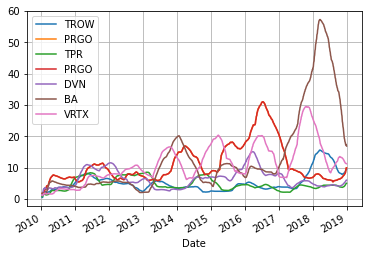

In [205]:
"""
# Moving Window Function

An important class of array transformation used fopr time series operations
are stsistcs and other functions evaluated over a sliding window or
with exponentially decaying weights. Good for smoothing noisy or gappy data. 

"""

SPY_px = pd.read_csv('SPY.csv',
                      parse_dates=True,
                      infer_datetime_format=True,
                      index_col=['Date'])

close_px = pd.read_csv('sp500_closefull.csv',
                      parse_dates=True,
                      infer_datetime_format=True,
                      index_col=['Date'])


tickers_df = close_px[['TROW', 'PRGO','TPR', 'PRGO', 'DVN', 'BA', 'VRTX']]





tickers_df_std =  tickers_df.rolling(250, min_periods=10).std()
tickers_df.rolling(250, min_periods=10).std().plot(grid=True, legend='left')

,TROW,PRGO,TPR,PRGO,DVN,BA,VRTX
Date,,,,,,,
2010-01-04,54.400002,40.349998,36.310001,40.349998,76.570000,56.180000,44.240002
2010-01-05,54.705000,39.570000,36.530001,39.570000,76.610001,57.100000,43.510000
2010-01-06,54.520000,39.146666,36.843334,39.146666,76.546666,57.993333,43.016666
2010-01-07,54.417500,38.857500,37.005001,38.857500,76.402500,59.045000,42.637500
2010-01-08,54.314001,38.642000,37.058001,38.642000,76.346001,59.556000,42.243999
...,...,...,...,...,...,...,...
2018-12-24,90.856923,54.276923,34.697693,54.276923,25.163846,319.223844,167.363846
2018-12-26,90.456154,52.590770,34.413846,52.590770,24.776154,317.841536,165.996922
2018-12-27,90.304615,51.028462,34.322308,51.028462,24.445385,317.373845,165.239998


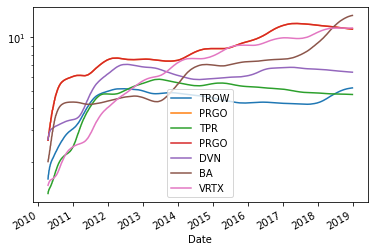

In [182]:
'''
In order to compute an expanding window mean, use the expanding operating instead of rolling.
Expanding mean starts the time window from the beginning of the time series and
increases the size of the window until it encompasses the whole series.
'''

expanding_mean = tickers_df_std.expanding().mean()

expanding_mean.rolling(60).mean().plot(logy=True)

#The rolling f accepts string indicating fixed-size time offset rather than number and periods.

#These are the same strigs you can pass to resample.

tickers_df.rolling('20D').mean()


<AxesSubplot:xlabel='Date'>

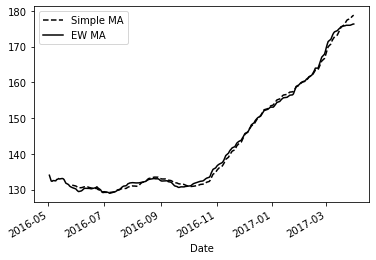

In [199]:
"""
Exponentially Weighted Functions
An alternative to using a static window size with equally weighted observations
is to specify a constant decay factor to give more weight to more recent obsevations,

SInce an exponentially weighted statistic places more weight on more recent observations, 
it adapts aster to changes compareed with the equal-weighted version

pandas has the ewm operator to go along with rolling and expanding.
Here's an example comparing a 60-day moving average of a stock price an EW moving ave with spand=60
"""


BA_px = tickers_df.BA['2016/5':'2017/3']


ma60 = BA_px.rolling(30, min_periods=20).mean()


ewma60 = BA_px.ewm(span=30).mean()

ma60.plot(style='k--', label='Simple MA', legend='best')

ewma60.plot(style='k-', label='EW MA', legend='best')



In [ ]:
"""
# Binary Moving Window Functions

Some statistical operatios, like correlation and covariance, need to operate on two time series.

As an example;
financial analysts are often interested in a stocks correlation to a benchmark index like sp500

To do this first we conpute the percent change for the our data of interest

"""

spx_ps = SPY_px['Close']

spx_rets = spx_ps.pct_change()

returns = tickers_df.pct_change()

# the corr aggregation function after we call rolling can then compute the rolling correlation

corr = returns.BA.rolling(125,min_periods=100).corr(spx_rets)

corr.plot()

In [242]:
from scipy.stats import percentileofscore


<AxesSubplot:xlabel='Date'>

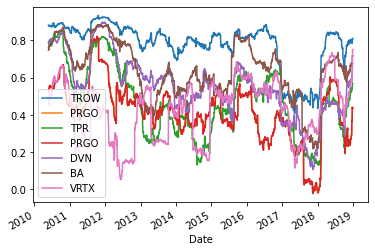

In [250]:
"""
Suppose you wanted to compute the correlation of the sp500
index with many stocks at once. writting allop and creating a df is repetetive

If you pass a series and a df,
a function like rollilng_corr will compute the correalation of the series
with each column of the dataframe

"""

corrS = returns.rolling(125,min_periods=100).corr(spx_rets)


corrS.plot()

# The apply method on rolling and related method provides a means to appy an 
# array function of your own devisiong over a moving window.
# The only requirement is that the fucntion produce a single value
# (a reduction) from each piece of the array.

<AxesSubplot:xlabel='Date'>

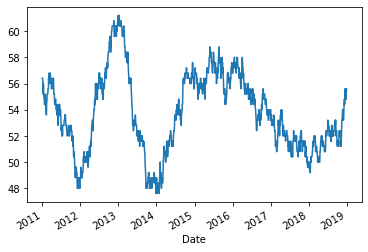

In [252]:
score_at_2pct = lambda x: percentileofscore(x, 0.002)

result2pct = returns.BA.rolling(250).apply(score_at_2pct)


result2pct.plot()